### Species Segmentation with Cluster Analysis

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
# Load the data
data = pd.read_csv('iris_dataset.csv')
# Check the data
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


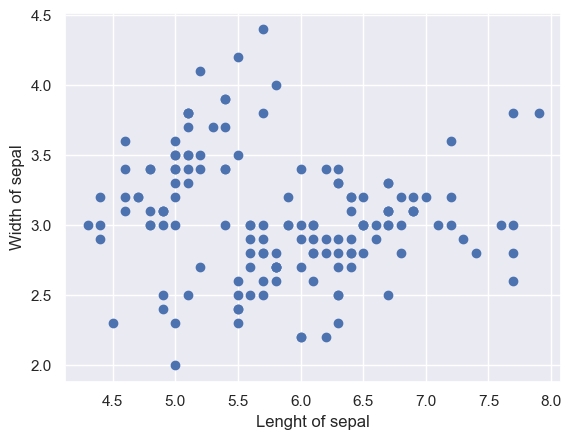

In [3]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(data['sepal_length'],data['sepal_width'])
# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [4]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

In [5]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

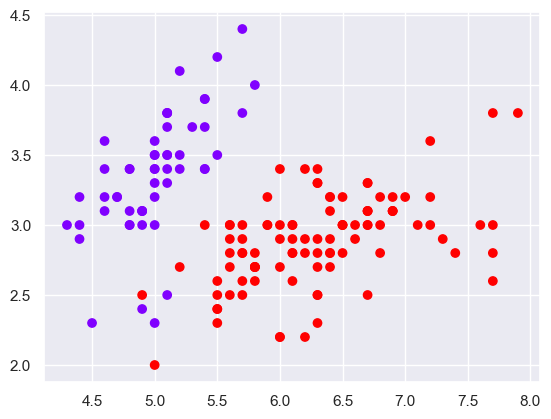

In [6]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

In [7]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [8]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [9]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

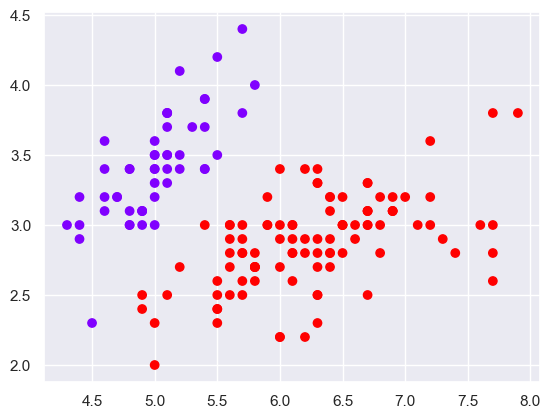

In [10]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

In [11]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676348,
 192.03717409190025,
 114.96770313827636,
 107.21072247315502,
 82.67637145232122,
 76.71641127824961,
 63.075588030440215,
 54.70400798851787]

Text(0, 0.5, 'Within-cluster Sum of Squares')

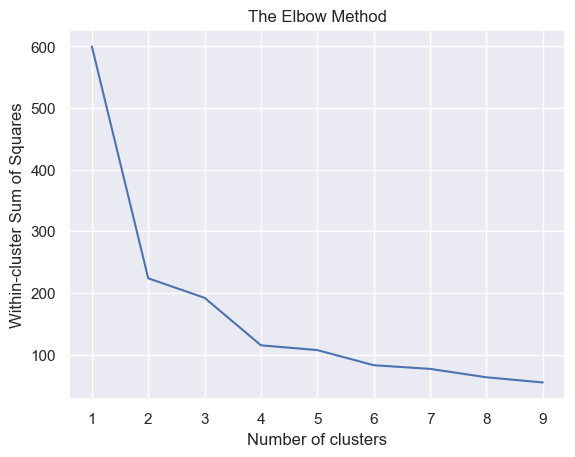

In [12]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [13]:
kmeans_2 = KMeans(2)
kmeans_2.fit(x_scaled)

KMeans(n_clusters=2)

In [14]:
# Remember that we are plotting the non-standardized values of the sepal length and width. 
clusters_2 = x.copy()
clusters_2['cluster_pred']=kmeans_2.fit_predict(x_scaled)

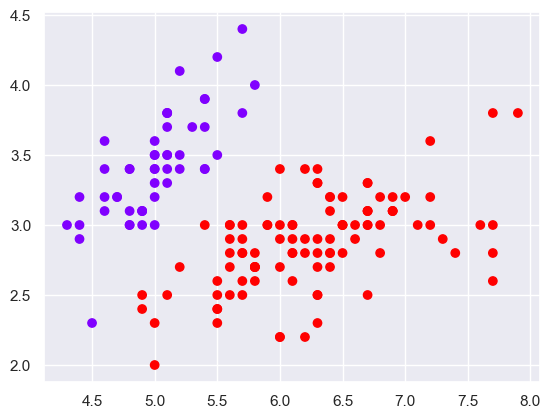

In [15]:
plt.scatter(clusters_2['sepal_length'], clusters_2['sepal_width'], c= clusters_2 ['cluster_pred'], cmap = 'rainbow')

#### 3 clusters

In [16]:
kmeans_3 = KMeans(3)
kmeans_3.fit(x_scaled)

KMeans(n_clusters=3)

In [18]:
clusters_3 = x.copy()
clusters_3['cluster_pred']=kmeans_3.fit_predict(x_scaled)

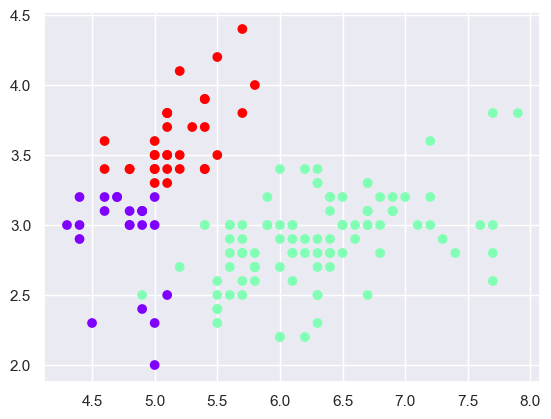

In [19]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

#### 5 clusters

In [21]:
kmeans_5 = KMeans(5)
kmeans_5.fit(x_scaled)

KMeans(n_clusters=5)

In [22]:
clusters_5 = x.copy()
clusters_5['cluster_pred']=kmeans_5.fit_predict(x_scaled)

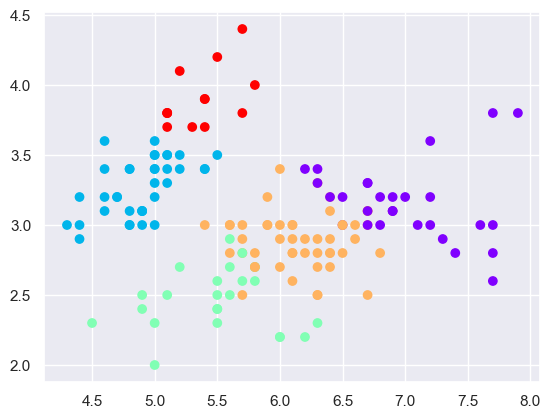

In [23]:
plt.scatter(clusters_5['sepal_length'], clusters_5['sepal_width'], c= clusters_5 ['cluster_pred'], cmap = 'rainbow')

In [24]:
real_data = pd.read_csv('iris_with_answers.csv')

In [25]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [26]:
# We use the map function to change any 'yes' values to 1 and 'no'values to 0. 
real_data['species'] = real_data['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [27]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


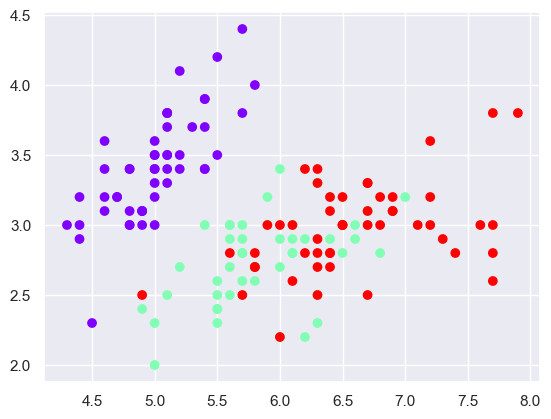

In [28]:
plt.scatter(real_data['sepal_length'], real_data['sepal_width'], c= real_data ['species'], cmap = 'rainbow')

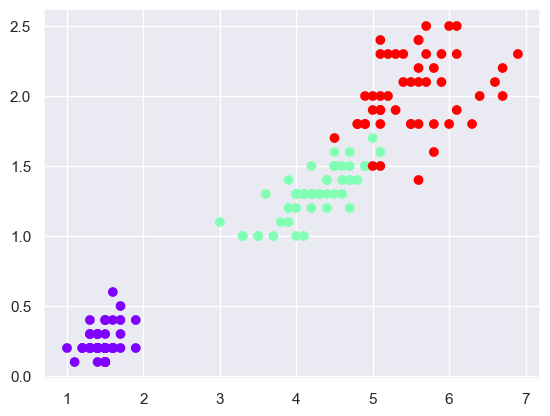

In [29]:
plt.scatter(real_data['petal_length'], real_data['petal_width'], c= real_data ['species'], cmap = 'rainbow')

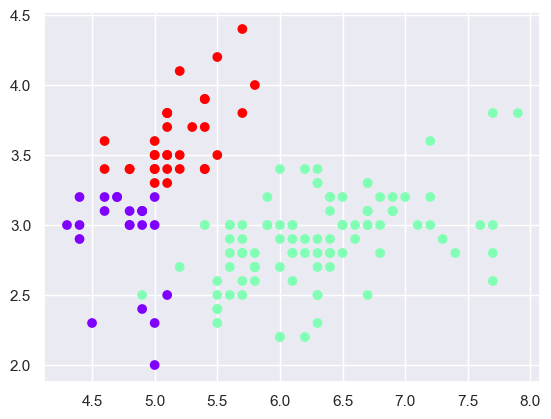

In [30]:
plt.scatter(clusters_3['sepal_length'], clusters_3['sepal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')

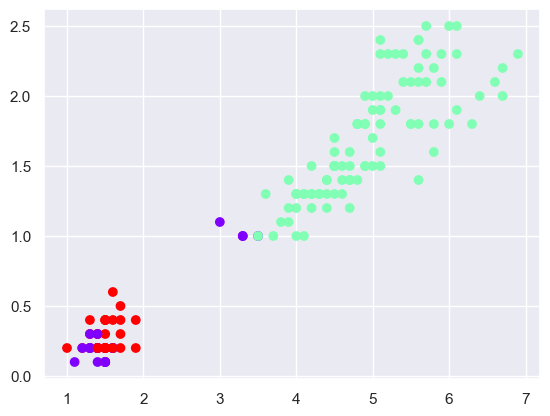

In [31]:
plt.scatter(clusters_3['petal_length'], clusters_3['petal_width'], c= clusters_3 ['cluster_pred'], cmap = 'rainbow')